In [18]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]

# Skip the first 2 comment lines created by merge-csv.com
df = pd.read_excel(dataset_name, skiprows=3)

print(df.head())
print(df.columns)


Saving combine_dataset_ball_metal_lock.xlsx to combine_dataset_ball_metal_lock (5).xlsx
   frame  trackID     range         x         y  z   vx   vy  vz  speed  ...  \
0   1916        7  1.677379 -0.210938  1.664062  0  0.0  0.0   0    0.0  ...   
1   1916        8  1.675818  1.046875  1.308594  0  0.0  0.0   0    0.0  ...   
2   1917        7  1.677379 -0.210938  1.664062  0  0.0  0.0   0    0.0  ...   
3   1917        8  1.675818  1.046875  1.308594  0  0.0  0.0   0    0.0  ...   
4   1918        7  1.677379 -0.210938  1.664062  0  0.0  0.0   0    0.0  ...   

   az  peakVal  peak_mean  peak_std  speed_mean  speed_std  energy_xyz  \
0   0       21       21.0       0.0         0.0        0.0         0.0   
1   0       11       11.0       0.0         0.0        0.0         0.0   
2   0       21       21.0       0.0         0.0        0.0         0.0   
3   0       11       11.0       0.0         0.0        0.0         0.0   
4   0       21       21.0       0.0         0.0        0.0   

In [19]:
print("Rows:", len(df))
print("Columns:", len(df.columns))
df.info()


Rows: 1936
Columns: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           1936 non-null   int64  
 1   trackID         1936 non-null   int64  
 2   range           1936 non-null   float64
 3   x               1936 non-null   float64
 4   y               1936 non-null   float64
 5   z               1936 non-null   int64  
 6   vx              1936 non-null   float64
 7   vy              1936 non-null   float64
 8   vz              1936 non-null   int64  
 9   speed           1936 non-null   float64
 10  ax              1936 non-null   float64
 11  ay              1936 non-null   float64
 12  az              1936 non-null   int64  
 13  peakVal         1936 non-null   int64  
 14  peak_mean       1936 non-null   float64
 15  peak_std        1936 non-null   float64
 16  speed_mean      1936 non-null   float64
 17  speed_std 

In [20]:
df.columns


Index(['frame', 'trackID', 'range', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'speed',
       'ax', 'ay', 'az', 'peakVal', 'peak_mean', 'peak_std', 'speed_mean',
       'speed_std', 'energy_xyz', 'track_duration', 'dopplerIdx', 'label'],
      dtype='object')

In [21]:
X = df.drop(columns=["label"])
y = df["label"]

print("Feature shape:", X.shape)
print("Labels:", y.unique())


Feature shape: (1936, 21)
Labels: ['bigball' 'metal lock' 'Table_tennis']


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 1452
Testing samples: 484


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)
print("Training Complete ✔")


Training Complete ✔


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

Table_tennis       1.00      1.00      1.00       170
     bigball       1.00      1.00      1.00        65
  metal lock       1.00      1.00      1.00       249

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484


Confusion Matrix:
 [[170   0   0]
 [  0  65   0]
 [  0   0 249]]


In [25]:
import numpy as np

importances = model.feature_importances_
features = X.columns

sorted_idx = np.argsort(importances)[::-1]

print("Top 15 most important features:\n")
for i in sorted_idx[:15]:
    print(f"{features[i]}: {importances[i]:.4f}")


Top 15 most important features:

frame: 0.3950
peakVal: 0.0919
peak_mean: 0.0895
range: 0.0845
y: 0.0756
trackID: 0.0619
dopplerIdx: 0.0461
x: 0.0298
speed_mean: 0.0284
track_duration: 0.0198
peak_std: 0.0167
energy_xyz: 0.0141
ay: 0.0109
speed_std: 0.0103
vy: 0.0095


In [46]:
from google.colab import files

print("Upload UNSEEN test CSV:")
uploaded_test = files.upload()
test_name = list(uploaded_test.keys())[0]

test_df = pd.read_csv(test_name)
test_df.head()


Upload UNSEEN test CSV:


Saving Unknow3_features.csv to Unknow3_features (1).csv


,frame,trackID,range,x,y,z,vx,vy,vz,speed,...,ay,az,peakVal,peak_mean,peak_std,speed_mean,speed_std,energy_xyz,track_duration,dopplerIdx
0,1087,6,1.464427,-0.503906,1.375000,0,0.0,0.0,0,0.0,...,0.0,0,8,8.0,0.0,0.0,0.0,0.0,1,2
1,1087,7,1.466718,0.550781,1.359375,0,0.0,0.0,0,0.0,...,0.0,0,7,7.0,0.0,0.0,0.0,0.0,1,2
2,1088,6,1.464427,-0.503906,1.375000,0,0.0,0.0,0,0.0,...,0.0,0,8,8.0,0.0,0.0,0.0,0.0,1,2
3,1088,7,1.466718,0.550781,1.359375,0,0.0,0.0,0,0.0,...,0.0,0,7,7.0,0.0,0.0,0.0,0.0,1,2
4,1089,6,1.464427,-0.503906,1.375000,0,0.0,0.0,0,0.0,...,0.0,0,8,8.0,0.0,0.0,0.0,0.0,1,2


In [47]:
predictions = model.predict(test_df)
predictions[:20]  # show first 20


array(['Table_tennis', 'Table_tennis', 'Table_tennis', 'Table_tennis',
       'Table_tennis', 'Table_tennis', 'Table_tennis', 'Table_tennis',
       'Table_tennis', 'Table_tennis', 'Table_tennis', 'Table_tennis',
       'Table_tennis', 'Table_tennis', 'Table_tennis', 'Table_tennis',
       'Table_tennis', 'Table_tennis', 'Table_tennis', 'Table_tennis'],
      dtype=object)

In [48]:
output = pd.DataFrame({"prediction": predictions})
output.to_csv("predicted_labels.csv", index=False)

from google.colab import files
files.download("predicted_labels.csv")

print("Predictions saved as predicted_labels.csv ✔")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions saved as predicted_labels.csv ✔


CELL A — PRINT CLEAN PREDICTION **RESULTS** **bold text**

In [43]:
import pandas as pd

result_df = pd.DataFrame({
    "frame": test_df["frame"],
    "trackID": test_df["trackID"],
    "range": test_df["range"],
    "prediction": predictions
})

print("\n🔮 Prediction Results (first 20 rows):")
result_df.head(20)



🔮 Prediction Results (first 20 rows):


,frame,trackID,range,prediction
0,1723,1,1.498127,Table_tennis
1,1724,1,1.502216,Table_tennis
2,1724,5,1.500732,Table_tennis
3,1725,1,1.502216,Table_tennis
4,1725,5,1.500732,Table_tennis
5,1726,1,1.502216,Table_tennis
6,1726,5,1.500732,Table_tennis
7,1727,1,1.498127,Table_tennis
8,1727,5,1.500732,Table_tennis
9,1728,1,1.498127,Table_tennis


CELL B — DISPLAY PREDICTION **COUNTS**

In [33]:
print("\n📌 Prediction Count Summary:")
print(result_df["prediction"].value_counts())



📌 Prediction Count Summary:
prediction
metal lock    92
Name: count, dtype: int64


CELL C — SAVE PREDICTIONS TO CSV

In [34]:
output_name = "Predicted_Unseen_Data.csv"
result_df.to_csv(output_name, index=False)

from google.colab import files
files.download(output_name)

print(f"\n✔ Saved predictions as {output_name}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✔ Saved predictions as Predicted_Unseen_Data.csv


CELL D — MODEL METRICS (Accuracy, Report & Confusion Matrix)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🎯 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔢 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Model Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

Table_tennis       1.00      1.00      1.00       170
     bigball       1.00      1.00      1.00        65
  metal lock       1.00      1.00      1.00       249

    accuracy                           1.00       484
   macro avg       1.00      1.00      1.00       484
weighted avg       1.00      1.00      1.00       484


🔢 Confusion Matrix:
 [[170   0   0]
 [  0  65   0]
 [  0   0 249]]


In [36]:
CELL E — PLOT CONFUSION MATRIX (Heatmap)

SyntaxError: invalid character '—' (U+2014) (ipython-input-571978053.py, line 1)

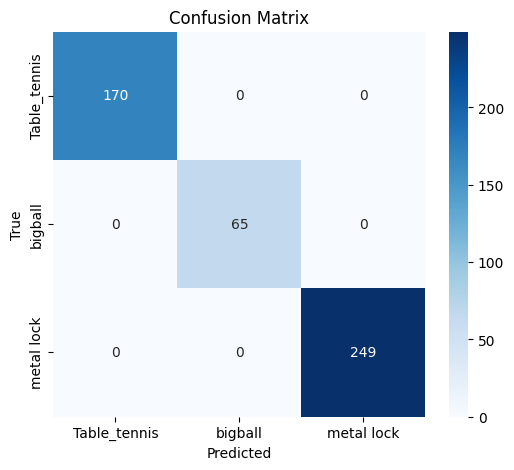

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


🔵 CELL F — PLOT FEATURE IMPORTANCE

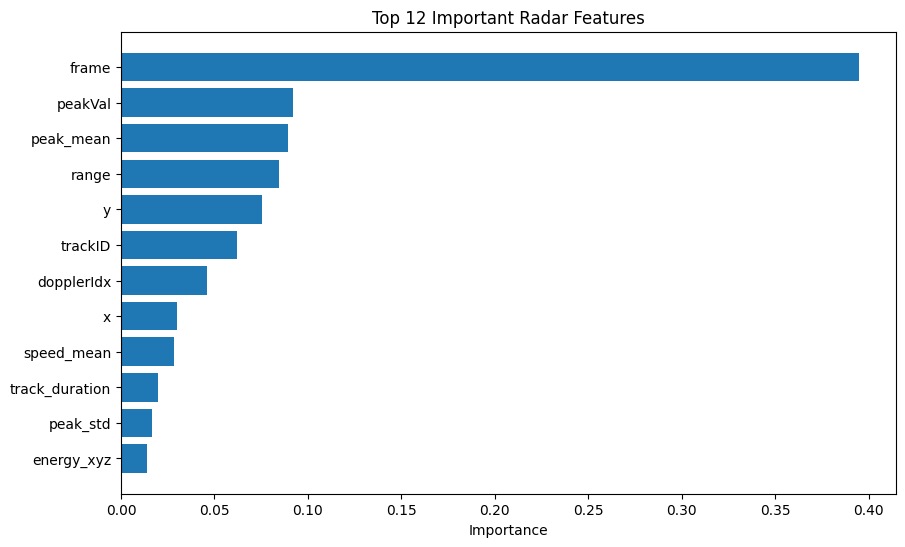

In [38]:
import numpy as np

importances = model.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_idx[:12]], importances[sorted_idx[:12]])
plt.xlabel("Importance")
plt.title("Top 12 Important Radar Features")
plt.gca().invert_yaxis()
plt.show()
